In [7]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

exp = 'exp7'
with open(exp + '_unlabeled.out') as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)

df['lipton-excess'] = df['lipton'] - df['bayes_error']
df['oracle-excess'] = df['oracle'] - df['bayes_error']

measure = ['lipton-excess', 'oracle-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

n_source n_target lipton-excess           oracle-excess          
                              mean       std          mean       std
0        25      100      0.211250  0.166980      0.102917  0.069344
1        50       10      0.217224  0.160118      0.100349  0.048950
2        50       20      0.224074  0.161246      0.104693  0.055347
3        50       40      0.196224  0.139567      0.111429  0.041937
4        50       80      0.186940  0.140077      0.102148  0.048862
5        50      100      0.171395  0.137761      0.100879  0.051295
6        50      160      0.171826  0.136940      0.101097  0.051133
7        50      320      0.161390  0.134864      0.097907  0.055213
8        50      640      0.151322  0.127080      0.092344  0.051230
9        50     1280      0.158178  0.129413      0.093662  0.049008
10       50     2560      0.175300  0.136594      0.105188  0.046384
11       50     5120      0.169840  0.132542      0.106090  0.047711
12      100      100      0.143401  0.093282      0.109423  0.046240
13      200      100      0.144430  0.094821      0.107360  0.046032
14      400      100      0.132419  0.076328      0.098945  0.045105
15      800      100      0.102193  0.069238      0.084744  0.051960
16     1600      100      0.081836  0.064699      0.067687  0.047091
17     3200      100      0.089200  0.071557      0.067669  0.044689
18     6400      100      0.082931  0.089638      0.045962  0.045090
19    12800      100      0.053210  0.066264      0.038810  0.044967

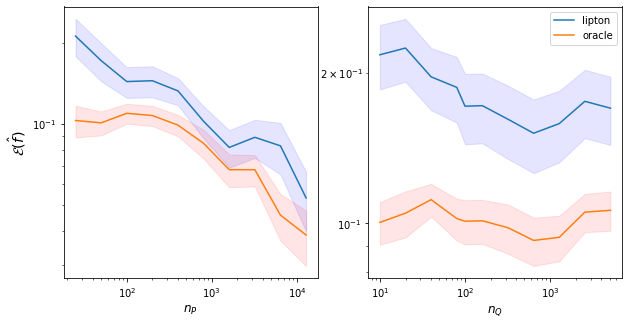

In [8]:
result1 = result.loc[result['n_target'] == 100]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['lipton-excess']['mean'], result1['lipton-excess']['std']
mean_o, std_o = result1['oracle-excess']['mean'], result1['oracle-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 50]

n, mean, std = result2['n_target'], result2['lipton-excess']['mean'], result2['lipton-excess']['std']
mean_o, std_o = result2['oracle-excess']['mean'], result2['oracle-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('lipton', 'oracle'), loc='middle left')
plt.show()

In [9]:
with open(exp + '_labeled.out') as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)

df['classical-excess'] = df['classical'] - df['bayes_error']
df['labeled-excess'] = df['labeled'] - df['bayes_error']

measure = ['classical-excess', 'labeled-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

n_source n_target classical-excess           labeled-excess          
                                 mean       std           mean       std
0        50      150         0.084404  0.048089       0.085833  0.044169
1        50      350         0.074734  0.043174       0.074019  0.043546
2        50      750         0.066080  0.045081       0.063684  0.045403
3        50     1550         0.057564  0.051018       0.055644  0.051286
4        50     3150         0.051623  0.041493       0.052532  0.041970
5        50     6350         0.041667  0.040556       0.041162  0.040119
6        50    12750         0.034167  0.043134       0.033965  0.042539
7       150       50         0.077523  0.052577       0.096492  0.049810
8       350       50         0.079600  0.048708       0.094396  0.052251
9       750       50         0.068797  0.050832       0.079807  0.040911
10     1550       50         0.077074  0.051019       0.066666  0.050081
11     3150       50         0.077103  0.045597       0.061124  0.048086
12     6350       50         0.084074  0.045634       0.062389  0.048579
13    12750       50         0.070352  0.051553       0.041194  0.047687

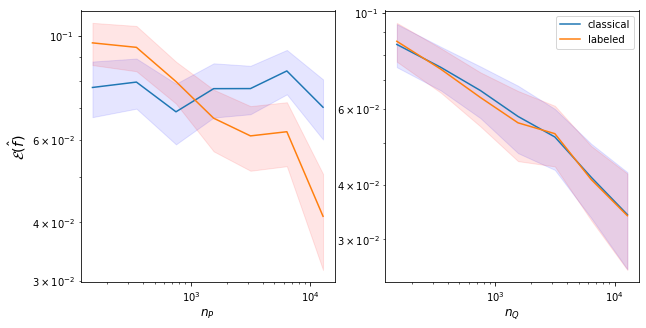

In [10]:
result1 = result.loc[result['n_target'] == 50]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['classical-excess']['mean'], result1['classical-excess']['std']
mean_o, std_o = result1['labeled-excess']['mean'], result1['labeled-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 50]

n, mean, std = result2['n_target'], result2['classical-excess']['mean'], result2['classical-excess']['std']
mean_o, std_o = result2['labeled-excess']['mean'], result2['labeled-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('classical', 'labeled'), loc='middle left')
plt.show()